<a href="https://colab.research.google.com/github/Whiteheim/WH/blob/main/Dec14_3_Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow와 Keras

Tensorflow - 구글에서 만든 Framework

# Keras

고성능 딥러닝 라이브러리

구글에서 만들어낸 Framework인 Tensorflow 안에서 Keras가 동작함

# Keras의 필요성

Tensorflow는 입문자에게 상당히 고난이도

Keras는 사용자(개발자)친화적으로 만들어져있어서 상대적으로 사용이 간편함

단순한 신경망 구성등 기존에 있는 것만으로 개발이 가능하다면, Keras만으로도 충분함

Detail Control에 한계가 있어서 Tensorflow로 함께 사용하면 조금 더 좋은 개발이 가능

In [1]:
import tensorflow as tf

In [2]:
# mnist 데이터 확보
mnist = tf.keras.datasets.mnist

In [3]:
# 케라스를 이용해서 train_data, test_data 나누기
train_data, test_data = tf.keras.datasets.mnist.load_data()
# tf.keras.datasets.mnist.load_data() : 학습용 데이터, 테스트용 데이터를 각각 (feature, label)(문제, 답) 형태로 반환 

(img_train, label_train) = train_data
(img_test, label_test) = test_data

# 데이터 확인
print(train_data) # 학습용 데이터
print()
print(test_data)  # 테스트용 데이터

11490434/11490434 [==============================] - 0s 0us/step
(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
   

In [4]:
print(img_train.shape)
print(label_train.shape)
print(img_test.shape)
print(label_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [11]:
img = img_train[150]
img.shape

(28, 28)

<function matplotlib.pyplot.show(*args, **kw)>

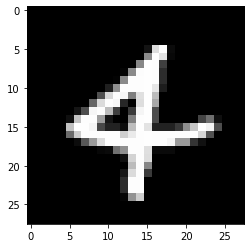

In [12]:
import matplotlib.pyplot as plt

plt.imshow(img, 'gray')
plt.show()

# 주요 용어 

# 하이퍼 파라미터 (Hyper-Parameter)

머신러닝 or 딥러닝에서 모델을 훈련시킬 때,

조금 더 나은 조건에서 훈련할 수 있도록 [사용자가 직접] 설정해주는 옵션값

ex) 학습 속도, 반복횟수 , ... 등을 사용자가 직접 설정

---

어떤 값을 어떻게 설정하는지에 따라, 그 모델의 성능이나 결과가 달라짐

사용자가 따로 옵션을 설정하지 않으면, 자동적으로 default값을 적용



# 에포크 (epoch)

반복 횟수 지정

데이터를 학습시키는 과정을 몇 번 반복해서 모델이 최적의 가중치를 찾아낼 수 있도록 하는 방법



# 과소적합(underfitting) vs 과대적합(overfitting)

모델 학습에 있어서 데이터는 크게

학습용 데이터 / 테스트(예측)용 데이터로 구분

학습용 데이터 - 반복적으로 학습을 시키면 모델은 사람이 발견하기 어려운 패턴을 발견하게 되어
사람의 예측성능 보다 우월한 모델 생성이 가능

예측용 데이터 - 예측용 데이터가 학습시킨 모델과는 다른 데이터의 분포를 가지고 있거나, 학습시킨 데이터가 한 쪽으로 치우친(편향된) 데이터일 때, 그 모델은 예측성능이 떨어지게 됨


  * 과소적합 : 모델이 충분히 학습하지 못한 경우 -> 예측 성능 저하
  * 과대적합 : 학습데이터를 지나치게 많이 반복학습을 시킨 경우

=> 이 두가지 문제를 최소화 하며, 정확도를 높일 수 있도록 해야함

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# mnist dataset 가져오기

from tensorflow.keras import datasets
mnist = datasets.mnist

In [18]:
# train / test 용 나누기
(train_data, train_label), (test_data, test_label) = mnist.load_data()

In [19]:
train_data.shape

(60000, 28, 28)

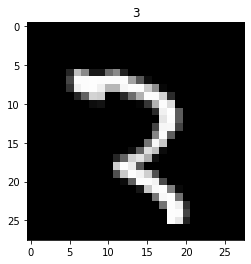

In [20]:
# matplotlib으로 
# 500번째에 있는 학습데이터의 data를 그림으로 출력 + 제목에는 그 그림에 해당하는 숫자가 나오도록
plt.title(train_label[500])
plt.imshow(train_data[500], 'gray')
plt.show()

# 딥러닝 프로세스 (Deep Learning Process)

# 1. 데이터 로드

# 2. 데이터 전처리 (Data Preperocessing)

Data를 Model에 입력하기 전 데이터를 '가공' 하는 단계

가지고 있는 데이터 종류, 모델에 적용하려는 훈련 방법 등에 따라서 전처리 방법은 천차만별

경우에 따라서는 배열의 차원에 변경이 이루어지기도 하고, 스케일의 조정이 이루어지기도 함 

데이터 전처리를 제대로 진행해야 다음에 나올 모델생성에서 올바르게 모델 정의를 할 수 있음

# 3. 데이터 분할(학습용, 테스트용)

# 4. 모델 생성

모델의 구조를 파악하고 만들어내는 단계
  * 모델 생성 방법
    * Sequential API : 순차적 구조의 모델
    * Functional API, Model Subclassing : 다중 입출력을 가진 복잡한 구조의 모델

# 5. 모델 컴파일 (compile)

만들어진 모델 훈련에 사용할 다양한 옵션 설정 가능

.compile() 함수를 사용
  * 손실함수(loss)
  * 옵티마이저(optimizer)
  * 평가지표(metrics)

# 6. 모델 훈련

.fit() 함수에 모델 훈련에 필요한 정보를 파라미터로 전달

  * 훈련 데이터셋
  * 검증 데이터셋
  * 배치(batch)
  * 크기
  * 콜백(call-back)

# 7. 모델 검증 (evalueate)

훈련이 끝난 모델이 얼마나 정확한지 검증하는 단계

모델 훈련시에 사용하지 않은 데이터셋을 모델에 입력시킨 후에, 그 모델이 예측한 값과 정답을 비교해서 평가지표를 내림 

이 검증결과를 바탕으로 모델 생성단계로 돌아가서 컴파일, 모델 수정 등이 이루어짐

목표한 성능에 도달할 때 까지 계속 그 과정이 반복 (4번 부터)

# 8. 예측 (predict)

test용 데이터를 입력해서 모델 예측값을 얻는 과정

# 2, 3, 4, 5번의 경우에는 모델 학습을 위한 필수 프로세스 (절대 빼먹으면 안됨)

In [ ]:
# (train_data, train_label) => 모델 학습용 , (test_data, test_label) => 테스트용

In [21]:
# 이미지 한장의 픽셀값의 최대, 최소값
# 정규화 하기 전
print(train_data.min()) # 최소값 : 0
print(train_data.max()) # 최대값 : 255

0
255


In [26]:
# 이미지에 대한 내용을 정규화 
train_data, test_data = train_data / train_data.max(), test_data / train_data.max()

print(test_data.shape) # (10000, 28, 28) - 데이터 값의 범위는 축소, 원본 배열 형태는 그대로 유지
# 10000 : dataset의 크기 / (28, 28) : 이미지의 크기

# 정규화 한 후에 train_data의 배열
train_data[0, 5:10, 5: 10]    # 정규화 후의 데이터는 모두 0 ~ 1 사이

# 정규화 : 데이터 값의 전체 범위를 0 ~ 1 사이의 값으로 조정하는것

(10000, 28, 28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.11764706, 0.14117647],
       [0.        , 0.        , 0.19215686, 0.93333333, 0.99215686],
       [0.        , 0.        , 0.07058824, 0.85882353, 0.99215686],
       [0.        , 0.        , 0.        , 0.31372549, 0.61176471]])

In [27]:
# 모델 생성

# Sequential() : 순차적 구조의 모델 >> 구조를 설정하고 층(layer)을 설정하는 부분
# [] : 대괄호 안에 있는 부분이 layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 1차원(vector)으로 평평하게 만들기
    # input_shape << 반드시 설정할 것
    # (28, 28) 크기의 matrix가 입력되면 1차원 vector로 바꾸어 달라
    tf.keras.layers.Dense(128, activation='relu'), # 은닉층 (중간층)에 신경망을 만드는 단계 
    # (128개 짜리 퍼셉트론으로 구성되는 layer 하나짜리)
    # activation='relu' : 은닉층의 활성화 함수
    tf.keras.layers.Dropout(0.2), # 과대적합을 막아주는 역할
    # 128개의 신경망중, 무작위로 20%는 0으로 만듬
    tf.keras.layers.Dense(10, activation='softmax')
    # 10개의 퍼셉트론으로 만든 레이어
    # 10개의 값을 출력하는 이유 : 0 ~ 9까지, 총 10개의 이미지가 어떤 숫자를 의미하는지 파악하기 위함
    # activation='softmax' : 마지막 층의 결과 값을 다중분류를 위한 확률값으로 계산할 수 있도록 도와주는 함수

    # 활성화 함수(activation) : 결과값을 변환해서 다른층으로 보내주는 역할

    # 'linear' : 기본값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력
    # 'relu' : rectifier 함수, 은닉층에서 주로 사용
    # 'sigmoid' : 시그모이드 함수, 이진 분류 - 출력층에서 주로 사용
    # 'softmax' : 소프트맥스 함수, 다중 분류 - 출력층에서 주로 사용
])
print(model.summary()) # 모델의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# 컴파일 
# .complie : 학습 방법에 대한 설정
#   sequential에서 정해진 모델을 컴퓨터가 알아들을 수 있는 말로 compile하는 부분
model.compile(
    optimizer='adam', # 최적화하기
    # 옵티마이저는 손실 함수를 통해 얻어낸 손실값으로부터 모델을 업데이트하는 방식
    # 그 중에서 adam이라는 옵티마이저를 사용
    loss='sparse_categorical_crossentropy',
    # 손실함수 (loss function) : 모델을 최적화 시킬 때 사용하는 함수
    # 손실함수는 신경망의 예측이 얼마나 잘 맞는지 측정하는 역할
    # categorical_crossentropy: 다중분류 손실함수 (one-hot encoding 클래스 기반)
    #   출력값이 one-hot encoding된 결과를 나타냄
    # sparse_categorical_crossentropy : 다중분류 손실함수 (one-hot encoding이 아닌것)
    #   출력값이 integer type 클래스로 반환
    # binary_crossentropy : 클래스가 2개인 이진 분류 손실함수
    #   label이 0 또는 1을 값으로 가질 때 사용
    metrics=['accuracy'] # 정확도 확인
)

In [30]:
# training, evaluation (훈련, 검증)
# .fit() : model을 실제로 학습시키는 단계
# (train_data, train_label), (test_data, test_label)
model.fit(train_data, train_label, epochs=10) # 6만개의 학습 데이터를 10번 반복훈련 하겠다

# 훈련데이터에서 사용하지 않았던 (test_data, test_label)로 검증/평가
model.evaluate(test_data, test_label)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1418 - accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1073 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0908 - accuracy: 0.9718
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0641 - accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9816
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9819
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9846
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0735 

[0.07352855056524277, 0.9794999957084656]

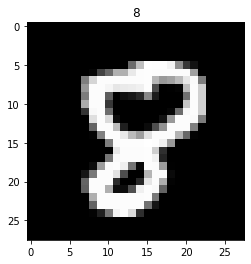

In [51]:
# data 탐색

# 훈련용 데이터의 길이 만큼의 숫자중, 랜덤한 숫자 하나 뽑아와서 확인
index = np.random.randint(len(train_data))

# 해당하는 숫자가 있는 train_data의 데이터를 img2라는 변수에 넣음
img2 = train_data[index]

plt.imshow(img2, 'gray')
plt.title(train_label[index])
plt.show()

# 내가 만든 그림으로 확인하기

그림판으로 숫자하나 그려서 저장

그림판 크기 => (28, 28)

In [52]:
import os
from PIL import Image
from google.colab import files

upload = files.upload()

Saving three.png to three.png


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=28x28 at 0x7F799EB51700>


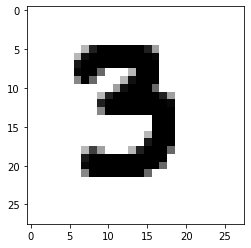

In [55]:
# 경로 설정
dir = os.getcwd()
imgPath = os.path.join(dir, 'three.png')

# 파일 읽기
nowImg = Image.open(imgPath)
print(nowImg)

# 28 x 28로 사이즈 변환
nowImg = nowImg.resize((28, 28))
myImg = np.asarray(nowImg)

# 컬러 이미지의 경우 RGB의 평균값으로 변경
try:
  myImg = np.mean(myImg, axis=2)
except:
  pass

# 이미지의 RGB평균을 절대값으로 계산해 다시 이미지에 넣는 작업
myImg = np.abs(255 - myImg)
myImg = myImg.astype(np.float32) / 255

plt.imshow(myImg, 'gray')
plt.show()

In [60]:
# shape를 병경해서 학습된 model과 비교
myImg = np.reshape(myImg, (1, 28, 28))
print(model.predict(myImg))

print('Model이 예측한 값은 {}'.format(np.argmax(model.predict(myImg))))

1/1 [==============================] - 0s 22ms/step
[[8.5288060e-26 2.9144219e-29 9.8396653e-01 8.6790681e-07 0.0000000e+00
  1.6029567e-02 6.2056935e-12 2.9848118e-06 6.3719047e-36 0.0000000e+00]]
1/1 [==============================] - 0s 18ms/step
Model이 예측한 값은 2
